##  <font color='273469'> Product Trend Analysis: Amazon Reviews in the Personal Care Vertical <font><a class='anchor' id='top'></a>
 ===== </br>
 **Author:** Stephanie Lo

### <font color='256D85'>Table of contents<font><a class='anchor' id='top'></a>
1. [Introduction to Project](#1)</br>
    a.[Introduction to notebook](#1.a)

2. [Product Data Cleaning](#2)</br>
    a.[Product Data Dictionary](#2.a)</br>
    b.[Processing Null Values](#2.b)</br>
    c.[Removing Duplicated Data](#2.c)</br>

3. [Exploration of Review Dataset](#3)</br>
    a.[Review Data Dictionary](#3.a)</br>
    b.[Processing Null Values](#3.b)</br>
    c.[Removing Duplicated Data](#3.c)
    
4. [Initial Data Analysis](#4)</br>
    a. [Exploring cleaned data sets](#4.a)</br>
    b. [How do we diagnose if a product is trending or not?](#4.b)</br>
    c. [Calculating the trending category column](#4.c)</br>
5. [Conclusion to the Notebook](#5)

## <font color='256D85'> Introduction to the project  <font> <a id="1"></a>

For this project, we will be exploring an Amazon Reviews 2018 dataset concentrated on the personal care industry, more specifically any products that are in the Luxury Beauty category on Amazon. According to Statista, the US personal care industry is predicted to generate $65 billion in 2023, therefore business decisions made around creating and marketing products require increasing levels of proof of concept in order to avoid wasted investment. The main goal of this project are to be able to determine whether we can model out if a product is trending or not, which can have many utilities from a company's perspective including, but not limited to: having a pulse check on what products the market is interested in or, being able to promote ideas to generate content for marketing strategies. This is in the best interest of companies who constantly have to innovate and stay relevant to keep up with personal care trends that are now spreading faster and faster due to advent of social media. Whilst this project focuses on one product category, the methodology and process can also be extended to include other categories. 

### <font color='256D85'> Introduction to notebook <font> <a id="1.a"></a>

This first notebook will explore our initial datasets relating to reviews and metadata with the main aim to identify how we might define a product as trending. Additionally, we will also be doing some light feature engineering in choosing how we might handle null values. By the end of the notebook, there will be a checkpoint csv that will be used in the next notebook. 

### <font color='256D85'> Product Meta Data Cleaning <font> <a id="2"></a>

In [1]:
#importing base packages 
import numpy as np
import pandas as pd
import os
import re

#importing data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
#Setting figure size & background 
plt.rcParams["figure.figsize"] = (8.0, 6.0)
sns.set_theme(style="darkgrid")

In [3]:
#directing to the right file path
os.chdir("/data/CAPSTONE")
cwd = os.getcwd() 

The datasets that have been chosen for this project are in JSON format which stands for JavaScript Object Notation, which is slightly trickier to work with than say a csv file since it often contains nested data, similar to the idea of nested dictionaries in python. That being said, it is still possible to process the data, but it will just require a few extra steps. Let's open up and examine our metadata data. 

In [4]:
#Opening the metadata JSON dataset

metadata_df = [] #empty list

#assigning data types to each column
r_dtypes = {"category": object,
            "tech1": object,
            "description": object,
            "fit": object,
            "title": object,
            "also_buy": list,
            "tech2": object, 
            "brand": object,
            "feature": object,
            "rank":object,
            "also_view": list, 
            "details": object,
            "Shipping Weight": object,
            'International Shipping': object,
            "ASIN": object, 
            "Item model number": object,
            "main_cat": object,
            "similar_item": object,
            "date": object,
            "price": np.float32,
            "asin": object, 
            "imageURL": list, 
            "imageURLHighRes": list ,
           }

#opening the dataset in chunks for easier processing on computer memory
with open("meta_Luxury_Beauty.json", "r") as f:
    reader = pd.read_json(f, orient="records", lines=True, 
                          dtype=r_dtypes, chunksize=1000)
    
    #dropping empty columns
    for chunk in reader:
        reduced_chunk = chunk.drop(columns=["tech1","tech2","fit","feature","main_cat","similar_item","date"],axis=1)
        metadata_df.append(reduced_chunk)
    
metadata_df = pd.concat(metadata_df, ignore_index=True)

In [5]:
#row and column count
print(f"Initial Metadata data contains {metadata_df.shape[0]} rows and {metadata_df.shape[1]} columns")

Initial Metadata data contains 12299 rows and 12 columns


In [6]:
metadata_df.head(5)

,category,description,title,also_buy,brand,rank,also_view,details,price,asin,imageURL,imageURLHighRes
0,[],[After a long day of handling thorny situation...,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",,"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,$30.00,B00004U9V2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,[],[If you haven't experienced the pleasures of b...,AHAVA Bath Salts,[],,"1,633,549 in Beauty & Personal Care (",[],{' Product Dimensions: ': '3 x 3.5 x ...,,B0000531EN,[],[]
2,[],"[Rich, black mineral mud, harvested from the b...","AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4",[],,"1,806,710 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '5.1 x 3 x ...,,B0000532JH,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,[],[This liquid soap with convenient pump dispens...,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",[],,[],"[B00004U9V2, B00GHX7H0A, B00FRERO7G, B00R68QXC...",{' Product Dimensions: ': '2.6 x 2.6 ...,$15.99,B00005A77F,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],[Remember why you love your favorite blanket? ...,Soy Milk Hand Crme,"[B000NZT6KM, B001BY229Q, B008J724QY, B0009YGKJ...",,"42,464 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '7.2 x 2.2 ...,$18.00,B00005NDTD,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


Taking a look at the top five columns of the data, we can see a mix of numeric and non-numeric columns - all of which relate to describing the product themselves. All of this data would typically be displayed on an Amazon product listing where it contains information on the product such as the title, description, associated images and price. Something that we can keep in mind moving forward are that currently the `category` and `brand` columns currently do not seem to read in any data (they show empty lists), which could be problematic since aspects such as category and brand may have an effect on whether the product is trending or not. For further clarification on the specific column and their contents let's take a look at the data dictionary. 

### <font color='256D85'> Meta Data Dictionary <font> <a id="2.a"></a>

| **Column Name**   | **Contents**                                                | **Data Type** |
|-------------------|-------------------------------------------------------------|---------------|
| `category`        | Category of product                                         | object        |
| `description`     | Description of product                                      | object        |
| `title`           | Product headline                                            | object        |
| `also_buy`        | Related ASINs that purchasers have also bought              | list          |
| `brand`           | Brand name                                                  | object        |
| `rank`            | Ranking of the category at the time of the data extraction  | object        |
| `also_view`       | Related ASINs, those that have also been viewed             | list          |
| `details`         | Dictionary containing information on the products           | Dictionary    |
| `price`           | Price of product at the time when data was scraped          | float         |
| `asin`            | ASIN product ID                                             | object        |
| `imageURL`        | Image URLs associated with the product                      | list          |
| `imageURLHighRes` | High resolution image urls associated with the product      | list          |

Looking at the columns above it looks like we will need to evaluate any of the columns that are in list or dictionary form, more specifically the `also_buy`, `also_view` and `details` columns. One of the first things we can do is to check that each of the columns are the right datatypes.

#### Editing Data Types

Let's check our data types:

In [7]:
#getting information on column types
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12299 entries, 0 to 12298
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         12299 non-null  object
 1   description      12299 non-null  object
 2   title            12299 non-null  object
 3   also_buy         12299 non-null  object
 4   brand            12299 non-null  object
 5   rank             12299 non-null  object
 6   also_view        12299 non-null  object
 7   details          12299 non-null  object
 8   price            12299 non-null  object
 9   asin             12299 non-null  object
 10  imageURL         12299 non-null  object
 11  imageURLHighRes  12299 non-null  object
dtypes: object(12)
memory usage: 1.1+ MB


A couple of items that we can work on are as follows: 
- `price` is an object right now but should be to convert to a float value. 
- `rank` has a combination of numbers and strings i.e. 4,324 in Beauty & Personal Care. However, since the string is repeated in each column it is irrelevant information so we can keep the value of the ranking by extracting the number.

Let's start revising these types, starting with `price`:

In [8]:
#removing dollar sign from price and replacing those values with 0 
metadata_df["price"] = metadata_df["price"].str.replace("$", "", regex=False)
metadata_df["price"].fillna(0, inplace = True)

In [9]:
#extracting string and converting to float
metadata_df["price"] = metadata_df["price"].str.strip()
metadata_df["price_USD"]= metadata_df["price"].str.extract(r"(\d*?\.\d{2})", expand=False)
metadata_df["price_USD"] = metadata_df["price_USD"].astype(float)
metadata_df.sample(1)

,category,description,title,also_buy,brand,rank,also_view,details,price,asin,imageURL,imageURLHighRes,price_USD
3338,[],[High-pigment mineral makeup blush for expert ...,"glo Minerals Blush, Rosebud",[],,"450,238 in Beauty & Personal Care (","[B075JNH41G, B07DVZ69HG, B0015YR9Z4, B01HC0KLIQ]",{' Product Dimensions: ': '2 x 0.5 x ...,,B002ZVXHCU,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


Looks like we have a column for price as a float under the column name `price_USD`, now we can move onto processing `rank`.  An easy way to separate the numerical values out is to split out the value based on the first space since we have pattern: "number" + " " + "in Beauty & Personal Care". 

In [10]:
#creating two new columns by splitting out based on the first space
metadata_df[["ranking","remove"]] = metadata_df["rank"].str.split(" ", n=1,expand = True)

In [11]:
#convert ranking column to integer
metadata_df["ranking"] = metadata_df["ranking"].str.replace(",", "", regex=False)
metadata_df["ranking"].fillna(0, inplace = True)
metadata_df["ranking"] =metadata_df["ranking"].astype("int32")
metadata_df.sample(1)

,category,description,title,also_buy,brand,rank,also_view,details,price,asin,imageURL,imageURLHighRes,price_USD,ranking,remove
11176,[],[Rework your style throughout the day with thi...,"EIMI Texture Touch, Matte Defining, Flexible H...","[B0175D63SC, B0175D5RDO, B004XJI9RU, B01783RLK...",,"67,525 in Beauty & Personal Care (","[B0175D63SC, B0175D5RDO, B00MV5P8L8, B0175D62N...",{' Product Dimensions: ': '2.5 x 1.5 ...,14.95,B01783REQE,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,14.95,67525,in Beauty & Personal Care (


We have now processed the column `rank` where the numerical column shows under `ranking`, let's drop the columns that we processed and double check for the right data types. 

In [12]:
#removing old columns
metadata_df.drop(["remove","rank","price"],axis=1,inplace=True )

In [13]:
#checking data types
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12299 entries, 0 to 12298
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         12299 non-null  object 
 1   description      12299 non-null  object 
 2   title            12299 non-null  object 
 3   also_buy         12299 non-null  object 
 4   brand            12299 non-null  object 
 5   also_view        12299 non-null  object 
 6   details          12299 non-null  object 
 7   asin             12299 non-null  object 
 8   imageURL         12299 non-null  object 
 9   imageURLHighRes  12299 non-null  object 
 10  price_USD        6958 non-null   float64
 11  ranking          12299 non-null  int32  
dtypes: float64(1), int32(1), object(10)
memory usage: 1.1+ MB


This looks good, let's move on to check how much missing data we may need to handle however, it is pretty alarming that we see all columns except `price_USD` containing no null values. 

### <font color='256D85'> Processing missing values <font> <a id="2.b"></a>

One of the important first steps in exploratory data analysis (EDA) is to check for missing data, since it is better computationally down the line to remove or process any missing values and have a clean dataset. Something that we took note of in the initial view of the data is that a lot of these columns including `category`, `description`, `also_buy` are in lists. Let's try to remove these lists to see how many missing values we have.

In [14]:
metadata_df.sample(1)

,category,description,title,also_buy,brand,also_view,details,asin,imageURL,imageURLHighRes,price_USD,ranking
10778,[],[Agadir Argan Oil Hair Treatment has been deve...,"AGADIR Unisex Argan Oil Spray Treatment, 2 oz",[],,"[B002QG6P9G, B001U9M2EW, B00DODYM18, B007N6HSR...",{' Product Dimensions: ': '1.4 x 2 x ...,B014F00R94,[],[],16.99,74575


In [15]:
#applying NaN values in place of empty lists
metadata_df = metadata_df.where(~metadata_df.applymap(lambda x: x == [] or x is None or x == ''))

# removing list from description and creating new column
metadata_df["product_description"] = metadata_df["description"].str.join(', ')

metadata_df.sample(1)

,category,description,title,also_buy,brand,also_view,details,asin,imageURL,imageURLHighRes,price_USD,ranking,product_description
6215,NaN,[The FHI Heat Runway IQ Session Styling Rapid ...,FHI Brands Runway IQ Session Styling Roller Gr...,NaN,NaN,NaN,{' Product Dimensions: ': '6 x 1 x 1 ...,B00CAA4DVK,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,407460,The FHI Heat Runway IQ Session Styling Rapid H...


This looks a lot better with the null values now being replaced by NANs. Let's check and plot out the nulls.

In [16]:
#checking total amount of null values by column
nan_count = metadata_df.isna().sum()
print(nan_count)

category               12299
description              150
title                      0
also_buy                4575
brand                  12287
also_view               3253
details                    0
asin                       0
imageURL                2052
imageURLHighRes         2052
price_USD               5341
ranking                    0
product_description      150
dtype: int64


In [17]:
def plot_nulls(df: pd.DataFrame):
    '''
    This function will read in a dataframe and plot out the percentage of null values (if present) in each column of the dataframe.
    '''
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'% missing values' :na_df})
        missing_data.plot(kind = "barh", color = 'navy')
        
        plt.xlabel("Percentage of missing values in column")
        plt.ylabel("Column name")
        plt.title(f'Columns of null values present')
        plt.show()
        
    else:
        print("No nulls found")

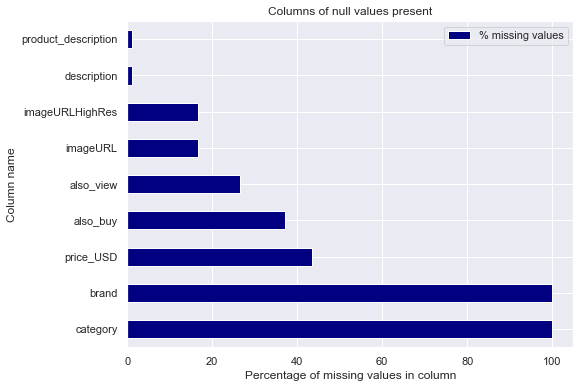

In [18]:
plot_nulls(metadata_df)

Let's go through these columns containing missing values and see what the best plan of action might be: 

- `Brand` and `Category`: are at 100% of missing data so these columns can be dropped, however these could make for good ideas when it comes around to feature engineering. 
- `price_USD`: is quite alarming at containing close to 42% of missing value data. This may be something that we might want to try and save since price could be related to our target column. For example, extremely low or high associated prices could prompt someone to review a product. 
- `also_buy` and `also_view`: this is nice to have information that may indicate how many times the product has shown up in another listing of the dataset. Best course of action may be to fill the null values with zeros. 
- `imageURL` and `imageURLHighRes`:  are not particularly relevant for this project so we can remove these. 
- `description`: seems to have a low level of missing values, dependent on the true percentage of this we could drop the rows since this will not cause so much data loss. 

Let's clean up the data frame a little by removing some of the columns we mentioned above.

In [19]:
#removing columns 
columns= ["category", "brand", "imageURL","imageURLHighRes","description"]

metadata_df.drop(columns,axis=1, inplace=True)
metadata_df.head(1)

,title,also_buy,also_view,details,asin,price_USD,ranking,product_description
0,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,B00004U9V2,30.0,4324,After a long day of handling thorny situations...


#### `also_buy` and `also_view` processing

We can now extract also buy and also view counts from the lists so that we can remove these lists and replace them with a numerical value. We want to keep these columns since the number of times that a product may show up on another listing may indicate its popularity. The method for how we can count the number of times the product id has been mentioned is to expand the lists and separate out each product number and then match the number of times the product number has been mentioned in the `also_buy` and `also_view` columns.

In [20]:
#for loop to get also_buy counts, also_view counts 
columns = ["also_buy","also_view"]

for column in columns: 
    name =  column + "_" + "counts"
    
    #Using explode function to count all of the times each asin appears
    x = metadata_df.explode(column)[column]
    
    my_count = x.value_counts()
    
    #creating a dictionary
    dict_counts = my_count.to_dict()
    
    #assigning the values using the dictionary created and creating a new column
    metadata_df[name] = metadata_df["asin"].map(dict_counts)

In [21]:
#filling in null values with 0 counts
metadata_df["also_buy_counts"].fillna(0, inplace = True)
metadata_df["also_view_counts"].fillna(0, inplace = True)

In [22]:
metadata_df.head(1)

,title,also_buy,also_view,details,asin,price_USD,ranking,product_description,also_buy_counts,also_view_counts
0,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,B00004U9V2,30.0,4324,After a long day of handling thorny situations...,56.0,48.0


Now we have the columns `also_buy_counts` and `also_view_counts` which show the number of times in other listings the product has been mentioned for the 12,000 strong products that we have recorded. Next we want to explore the details columns and see if there is anything we may want to keep there.

#### Checking out the `details` column

We know that this column is a dictionary, so a quick way to check this is reading in the associate keys which could be interpreted as column names.

In [23]:
#taking a look at details column
d = metadata_df["details"].iloc[0]
d.keys()

dict_keys(['\n    Product Dimensions: \n    ', 'Shipping Weight:', 'Domestic Shipping: ', 'International Shipping: ', 'ASIN:', 'Item model number:'])

Taking a look at the values that are contained in the `details` column, none of these keys look like they would add a lot of value. If we didn't already have access to the ASIN then we could keep this value so we can drop this column as well as the other columns we have processed altogether.

In [24]:
#removing columns 
columns= ["details", "also_view", "also_buy"]

metadata_df.drop(columns,axis=1, inplace=True)
metadata_df.head(1)

,title,asin,price_USD,ranking,product_description,also_buy_counts,also_view_counts
0,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,B00004U9V2,30.0,4324,After a long day of handling thorny situations...,56.0,48.0


In [25]:
#check
metadata_df.isna().sum()

title                     0
asin                      0
price_USD              5341
ranking                   0
product_description     150
also_buy_counts           0
also_view_counts          0
dtype: int64

This looks a lot better let's move onto the last data cleaning steps and tackle the `description` column.

#### `description` processing

In [26]:
# % of na values of review_df
pct_null_description = (metadata_df["product_description"].isna().sum()/metadata_df.shape[0])*100
print(f"Null values of product_description make up {round(pct_null_description,2)}% of dataset, this is small so we can remove these lines")

Null values of product_description make up 1.22% of dataset, this is small so we can remove these lines


In [27]:
#removing rows where product description is null 
metadata_df = metadata_df[metadata_df["product_description"].notna()]

In [28]:
#check
metadata_df.isna().sum()

title                     0
asin                      0
price_USD              5218
ranking                   0
product_description       0
also_buy_counts           0
also_view_counts          0
dtype: int64

In [29]:
print(f"Product Dataset after having dropped most null values has {metadata_df.shape[0]} rows and {metadata_df.shape[1]} columns")

Product Dataset after having dropped most null values has 12149 rows and 7 columns


After having processed these columns we have a much simpler dataset but still have maintained the number of rows which is great. One thing that is still an issue is the `price_USD` column, but since we are measuring trending products and price may be an important factor in determining if it is trending we can leave these in for now since we need to merge the product dataset with the review dataset and this may reduce the number of missing values we have. 

### <font color='256D85'> Handling duplicated data <font> <a id="2.c"></a>

Duplicate entries of data are defined as having exactly the same information of one or more other entries in the data set. Duplicated data can lead to biased performance estimates since you have repeated information that may skew the dataset. Let's check if there are any in the product data frame.

In [30]:
# percentage of na values of metadata_df
sum_duplicates = metadata_df.duplicated().sum()
pct_duplicates = metadata_df.duplicated().sum()/metadata_df.shape[0]*100
print(f"There are {sum_duplicates} duplicate rows in the dataset which make up make up {round(pct_duplicates,2)} % of dataset")

There are 183 duplicate rows in the dataset which make up make up 1.51 % of dataset


This isn't a lot of duplicated data, what we can do is to take a closer look at some of the columns and make sure that there aren't any patterns to the duplication of data.

In [31]:
#value counts of duplicated data
duplicate_df = metadata_df[metadata_df.duplicated()]
duplicate_df.groupby("asin")["title"].value_counts(ascending=True)

asin        title                                                                                   
B00004U9V2  Crabtree &amp; Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ       1
B0000531EN  AHAVA Bath Salts                                                                            1
B0000532JH  AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4                                               1
B00005A77F  Crabtree &amp; Evelyn Hand Soap, Gardeners, 10.1 fl. oz.                                    1
B00005NDTD  Soy Milk Hand Crme                                                                          1
                                                                                                       ..
B0002ZZT5Y  Glycolix Elite Fortified Facial Cream, 1.6 oz                                               1
B0003MJ9DY  Glo Skin Beauty Minerals Blush, Sheer Petal                                                 1
B0003MJFSS  Glo Skin Beauty Precision Brow Pencil -

Doing a quick groupby the value counts seem to check out as just being duplicates so we can remove these from the dataset. 

In [32]:
#removing duplicates
metadata_df = metadata_df.drop_duplicates()

In [33]:
#sanity check
metadata_df.duplicated().sum()

0

In [34]:
#saving dataframe to under a new name
metadata_df_clean = metadata_df.copy()
metadata_df_clean.head(2)

,title,asin,price_USD,ranking,product_description,also_buy_counts,also_view_counts
0,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,B00004U9V2,30.0,4324,After a long day of handling thorny situations...,56.0,48.0
1,AHAVA Bath Salts,B0000531EN,NaN,1633549,If you haven't experienced the pleasures of ba...,0.0,0.0


In [35]:
print(f"Meta Dataset after having removed duplicate data has {metadata_df_clean.shape[0]} rows and {metadata_df_clean.shape[1]} columns")

Meta Dataset after having removed duplicate data has 11966 rows and 7 columns


We have now cleaned the product data frame, let's now do the same for the reviews. 

## <font color='256D85'> Review Data Cleaning <font> <a id="3"></a>

In [36]:
#Opening the review JSON dataset

review_df = [] #empty list

#assigning data types to each column
r_dtypes = {"overall": np.float16, 
            "verified": np.int32, 
            "vote": np.int32,
            "reviewTime": np.int32,
            "reviewerID": np.int32,
            "asin": object,
            "reviewerName": object,
            "reviewText":object , 
            "summary": object,     
            "style": object, 
            "image": object, 
           }

#opening the dataset in chunks for easier processing on computer memory
with open("Luxury_Beauty.json", "r") as f:
    reader = pd.read_json(f, orient="records", lines=True, 
                          dtype=r_dtypes, chunksize=1000)

    #droping unixReviewTime column since not needed
    for chunk in reader:
        reduced_chunk = chunk.drop(columns=["unixReviewTime"],axis=1)
        review_df.append(reduced_chunk)

#appending all chunks together in one dataframe
review_df = pd.concat(review_df, ignore_index=True)

In [37]:
#Reading in the data set
review_df.head(5)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,style,image
0,2.0,3,1,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,NaN,NaN
1,5.0,14,1,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,NaN,NaN
2,5.0,NaN,1,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,{'Size:': ' 3.5 oz.'},NaN
3,5.0,NaN,1,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,{'Size:': ' 3.5 oz.'},NaN
4,5.0,NaN,1,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,{'Size:': ' 3.5 oz.'},NaN


In [38]:
print(f"Initial Review Dataset has {review_df.shape[0]} rows and {review_df.shape[1]} columns")

Initial Review Dataset has 574628 rows and 11 columns


From looking at our review dataset we have a mix of both numerical and non-numeric columns. At an initial glance the main columns of interest are the first 2 columns since `overall` and `vote` points to information on the product quality, as well as non-numeric columns such as `reviewText` and `summary` since it speaks to the actual opinions of the products from reviewers. We'll need to explore these columns further, but to make sense of each column this can be best explained with the data dictionary below.

### <font color='256D85'> Review Data Dictionary <font> <a id=#3.a></a>

| Column Name    | Contents                                                      | Data Type  |
|----------------|---------------------------------------------------------------|------------|
| `overall`      | Rating given by user out of 5.0                               | numeric    |
| `verified`     | Denotes verified purchases or not                             | numeric    |
| `vote`         | Number of users that have liked the review                    | numeric    |
| `reviewTime`   | Recorded time of review                                       | DateTime   |
| `reviewerID`   | Unique reviewer ID                                            | object     |
| `reviewerName` | Name given of reviewer                                        | object     |
| `reviewText`   | Body of user review                                           | object     |
| `summary`      | Title of user review                                          | object     |
| `style`        | Dictionary object containing details on the product reviewed  | dictionary |
| `image`        | Associated images in JPEGs of the product uploaded by user    | object     |

From the overview of the data dictionary and the initial read through of the data it's good to take a mental note of the `style` column since additional processing will need to be applied to a column containing dictionaries. 

#### Editing Data Types

In [39]:
#reading in information on the dataset
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574628 entries, 0 to 574627
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   overall       574628 non-null  float16
 1   vote          103689 non-null  object 
 2   verified      574628 non-null  int32  
 3   reviewTime    574628 non-null  object 
 4   reviewerID    574628 non-null  object 
 5   asin          574628 non-null  object 
 6   reviewerName  574597 non-null  object 
 7   reviewText    574228 non-null  object 
 8   summary       574445 non-null  object 
 9   style         251013 non-null  object 
 10  image         7418 non-null    object 
dtypes: float16(1), int32(1), object(9)
memory usage: 42.7+ MB


Few things to note here: 
- `vote` needs to be edited to a numerical format, with the null values replaced to 0 since if there were no up votes on the review (not all reviews have up votes) this should be represented as 0.
- `ReviewTime` should be converted to Datetime since these are dates. 

We can convert these two columns quickly:

In [40]:
#filling Vote column nulls and converting to float type
review_df["vote"]= review_df["vote"].str.replace(",","").astype("float32")
review_df["vote"].fillna(0, inplace = True)

In [41]:
#sanity check
review_df["vote"].isna().sum()

0

In [42]:
#changing reviewTime to DateTime
review_df["reviewTime"] = review_df["reviewTime"].str.replace(",","")
review_df["reviewTime"] =pd.to_datetime(review_df["reviewTime"],
                                        dayfirst=True).dt.tz_localize(None)

/var/folders/k5/r4y7z25n2rz_yw3s46bn0m580000gn/T/ipykernel_16428/854469707.py:3: UserWarning: Parsing dates in %m %d %Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  review_df["reviewTime"] =pd.to_datetime(review_df["reviewTime"],


In [43]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574628 entries, 0 to 574627
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   overall       574628 non-null  float16       
 1   vote          574628 non-null  float32       
 2   verified      574628 non-null  int32         
 3   reviewTime    574628 non-null  datetime64[ns]
 4   reviewerID    574628 non-null  object        
 5   asin          574628 non-null  object        
 6   reviewerName  574597 non-null  object        
 7   reviewText    574228 non-null  object        
 8   summary       574445 non-null  object        
 9   style         251013 non-null  object        
 10  image         7418 non-null    object        
dtypes: datetime64[ns](1), float16(1), float32(1), int32(1), object(7)
memory usage: 40.6+ MB


Looks like all the data types are correct now. We can move onto the next step which is processing null values where we can also explore the dataset more. 

### <font color='256D85'> Processing missing values <font> <a id="3.b"></a>

We can apply the same methodology as we did for the product dataframe and plot out any missing values we have. 

In [44]:
#checking total amount of null values by column
nan_count = review_df.isna().sum()
print(nan_count)

overall              0
vote                 0
verified             0
reviewTime           0
reviewerID           0
asin                 0
reviewerName        31
reviewText         400
summary            183
style           323615
image           567210
dtype: int64


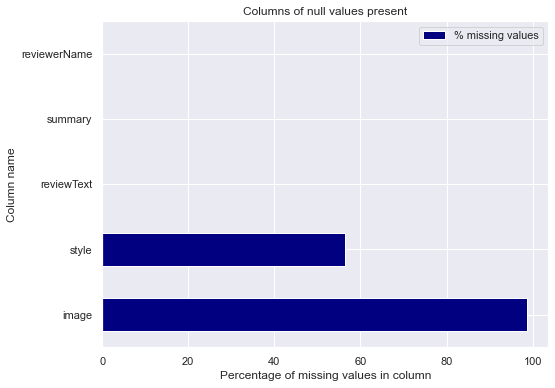

In [45]:
#calling function plot_nulls
plot_nulls(review_df)

From the summary and plot above we have columns consisting of null values of varying sizes: 
- `style`: is a dictionary so we should explore what the expanded columns may look like.
- `Image`: consists of almost all null values but is not relevant to our model since we are focusing on product related data so we can drop this column. 
- `reviewText` and `summary`: this amount is negligible (< 0.1% of the dataset) so we can drop these null values. 
- `reviewername` : can fill these in with other unique identifiers (i.e.reviewerID)

Now that we've identified the next steps for each column with null values we can now process them. Let's start with taking a look in `style` to see if there's any relevant information.

#### Exploring `style` column

To keep things more simple we will separate out the values in the style column into a new dataframe since we are unsure if there is data relevant in this column that may be useful for our cleaned dataset.

In [46]:
#creating a new df for style
style_df = review_df["style"].apply(pd.Series)

In [47]:
style_df.head(5)

,0,Size:,Flavor Name:,Color:,Format:,Scent:,Style:,Style Name:,Scent Name:,Package Quantity:,Flavor:,Package Type:,Design:,Item Package Quantity:,SCENT:
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3.5 oz.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.5 oz.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.5 oz.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that there were many columns nested in style such as size, scent or flavor information and also package information. It isn't obvious that these columns relate to our main objective of finding if a product is trending or not, but most important thing to note here is the amount of null values we see.

In [48]:
#checking for null values in style columns
pct_null_size = (style_df["Size:"].isna().sum()/review_df.shape[0])*100
print(f"Even column with the lowest amount of nulls, size, still contains {round(pct_null_size ,2)}% of null values")

Even column with the lowest amount of nulls, size, still contains 75.67% of null values


This would be too many null values to process, plus the fact that we have the metadata dataset that helps give us information on the product helps in our decision-making to drop this column. 

#### Processing remaining null values

As mentioned in the outline above we can now process the remaining null values in the dataset. 

In [49]:
#replacing na values of reviewer name with reviewer ID 
review_df["reviewerName"] =review_df.loc[:,"reviewerName"].fillna(review_df["reviewerID"])

In [50]:
# % of na values of review_df
pct_null_reviewText = review_df["reviewText"].isna().sum()/review_df.shape[0]*100
print(f"Null values of reviewText makes up {round(pct_null_reviewText,2)}% of dataset, this is small so we can remove these lines")

Null values of reviewText makes up 0.07% of dataset, this is small so we can remove these lines


In [51]:
#dropping image and style columns from review_df 
columns = ["style","image"]
for column in columns: 
     review_df = review_df.drop([column],axis=1)

In [52]:
#removing remaining rows with null values and checking row counts, saved to df1
review_df1 = review_df.dropna().copy()
print(f"Review Dataset after having evaluated missing data has {review_df1.shape[0]} rows and {review_df1.shape[1]} columns")

Review Dataset after having evaluated missing data has 574053 rows and 9 columns


In [53]:
#sanity check
review_df1.isna().sum().sum()

0

### <font color='256D85'> Duplicated review data <font> <a id="3.c"></a>

Let's check for any duplicates in the data. 

In [54]:
# % of na values of review_df
sum_duplicates = review_df1.duplicated().sum()
pct_duplicates = review_df1.duplicated().sum()/review_df1.shape[0]*100
print(f"There are {sum_duplicates} duplicate rows in the dataset which make up make up {round(pct_duplicates,2)} % of dataset, which is fairly large")

There are 34893 duplicate rows in the dataset which make up make up 6.08 % of dataset, which is fairly large


We can take a closer look into these duplicated rows quickly to see if there are any patterns we might see.  

In [55]:
#looking at a sample of duplicated rows
review_df1[review_df1.duplicated()].sample(5)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary
158451,5.0,0.0,1,2011-01-30,A50DC2J7AIH6N,B000ZOFUOC,Melle12,I have very dry sensitive skin and fight throu...,Serious Conditioning and Moisture!
183845,2.0,11.0,1,2015-04-19,A3I6JL5NM6KS3D,B0017SWIU4,ss,"Looks, smells and feels like Calamine lotion. ...",Not worth the money
175012,5.0,0.0,1,2017-07-28,AVVIFFV2JABO2,B00172O9NO,Jessie,I used this as a primer and setting spray and ...,... used this as a primer and setting spray an...
177059,5.0,0.0,1,2015-11-27,AYPJSMF8VASCD,B00176B8BG,Carlie Owsley,Great product. Perfect curls.,Five Stars
155542,5.0,2.0,1,2017-03-30,ABLHI2JOV2NPC,B000YBNL2Y,Nancy D Rydell,I have been using jane iredale makeup for year...,"it is good coverage, but you need to buy the f..."


In [56]:
pct_origin_row = review_df1.duplicated().sum() /review_df1.duplicated(keep=False).sum()
print(f"Each duplicated row appears close to twice at {round(pct_origin_row,2)}% of the dataset, so there was likely a data recording issue.")

Each duplicated row appears close to twice at 0.51% of the dataset, so there was likely a data recording issue.


With this quick analysis we have enough reasoning to drop these duplicated rows altogether, which finishes our initial data cleaning and makes it much easier to start exploring the data set. 

In [57]:
#removing duplicates
review_df1 = review_df1.drop_duplicates()
print(f"Review Dataset after having dropped duplicated data has {review_df1.shape[0]} rows and {review_df1.shape[1]} columns")

Review Dataset after having dropped duplicated data has 539160 rows and 9 columns


In [58]:
#creating clean review_df and copying in review_df into it 
clean_review_df = pd.DataFrame()
clean_review_df = review_df1.copy()

In [59]:
# sanity check
clean_review_df.isna().sum().sum()

0

#### Additional cleaning steps

One thing that we want to explore initially is the relationship between reviews and the products themselves. With this data set something we are lacking is sales data, so is there a way to check if a product is trending in the change of the amount of reviews that they have? An initial first step in this direction is exploring reviews over time, therefore we can plot out a couple of columns for `year` and `month`. 

In [60]:
#creating year and month columns according to reviewTime
clean_review_df["year"]  = clean_review_df["reviewTime"].dt.strftime("%Y").astype("int32")
clean_review_df["month"]  = clean_review_df["reviewTime"].dt.strftime("%m").astype("int32")
clean_review_df.head(1)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,year,month
0,2.0,3.0,1,2010-06-15,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,2010,6


## <font color='256D85'> Initial Data Analysis <font> <a id="4"></a>

A key question that we want to solve in this project is how do we determine if a product is trending in the absence of sales data? Often times unless you are an employee of the company itself you don't have access to sales statistics or social media engagement metrics which limits what a smaller company can do if they want to carry out some competitive analysis. However, since review data is publicly available for users to share we can try to gage if a product is trending through sentiment analysis or metrics that we do see online. Therefore, we will be exploring two main questions in this section:
- What do my datasets look like? 
- How do we diagnose if a product is trending or not?

### <font color='256D85'> Exploring cleaned data sets <font> <a id="4.a"></a>                                   

In this section we will be exploring some of the most relevant columns that we discovered when reading in the data that may give us any indication on how to measure if a product is trending. These columns are: `ranking` from the meta data frame and `reviews` from the review data frame. We can do so by exploring these columns and some data visualization. 

In [61]:
metadata_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11966 entries, 0 to 12298
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                11966 non-null  object 
 1   asin                 11966 non-null  object 
 2   price_USD            6828 non-null   float64
 3   ranking              11966 non-null  int32  
 4   product_description  11966 non-null  object 
 5   also_buy_counts      11966 non-null  float64
 6   also_view_counts     11966 non-null  float64
dtypes: float64(3), int32(1), object(3)
memory usage: 701.1+ KB


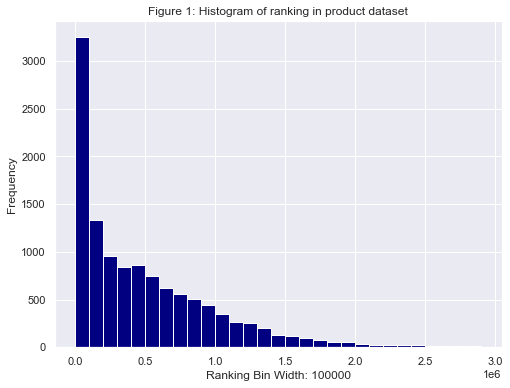

In [62]:
#histogram of reviews 
binwidth = 100000

fig, ax = plt.subplots()

plt.hist(metadata_df_clean["ranking"] , bins=np.arange(0,3000000, binwidth), color = "navy")

plt.xlabel(f"Ranking Bin Width: {binwidth}")
plt.ylabel("Frequency")
plt.title("Figure 1: Histogram of ranking in product dataset")

plt.show()

In Figure 1 above we can see that we have a right-skewed distribution with the highest number of products >3,000 ranking in the top 100,000 products in the Luxury Beauty Category and then the rest tapering off with each frequency descending as the ranking gets lower. Is ranking a good measure of if a product is trending? It is our one measurement that is tied to sales data, which you can read more about [here](https://www.sellerapp.com/amazon-best-seller-rank.html), however, it favors products that are able to sell at capacity and omits those that may come from smaller brands. Also, one objective of this project is to perform sentiment analysis and take into account what users are saying about the products that may indicate if it is trending or not. Let's take a look at overall review counts to explore this further. 

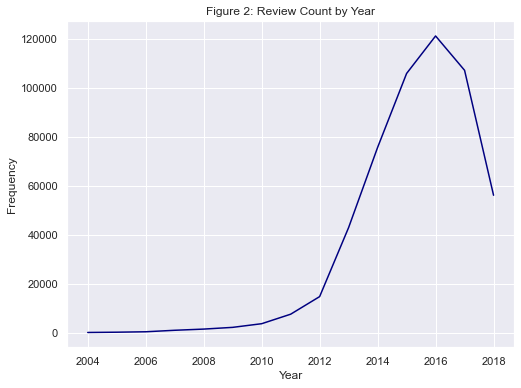

In [63]:
#Looking at number of reviews over the years
clean_review_df["year"].value_counts().sort_index().plot(color="navy")
plt.xlabel(f"Year")
plt.ylabel("Frequency")
plt.title("Figure 2: Review Count by Year")
plt.show()

In Figure 2 above we see that frequency of reviews recorded were fairly low at below 20,000 from 2004 until 2013, after that they peaked at 2016 with 120,000 reviews with this period containing the bulk of the reviews. 

### <font color='256D85'> How do we diagnose if a product is trending or not? <font> <a id="4.b"></a>

Now that we've established that we want to perform sentiment analysis to see if the contents of a user review can predict if it's trending, in this section of the notebook we will explore this concept.How might we be able to diagnose if a product is trending in the first place? We can analyze this by: 

- Looking at the relationship between absolute review counts and time. 
- Or look at the relationship between product rating and time.

These metrics have been chosen under the two following assumptions, if a product is trending we may see a substantial increase (or decrease) in the average rating or if a product is trending we could take a look at the number of absolute reviews with the line of thought that a measured increased in the amount of reviews indicates increasing interest in the product. Let's explore the two concepts and see which one may be more applicable. 

#### Analyzing product review counts

For this analysis let's keep things a little more simple and analyze one product to evaluate our questions above. As an example we can take the product with the highest amount of reviews in the dataset.

In [64]:
#value counts of reviews by asin
clean_review_df.groupby("asin")["asin"].count().sort_values(ascending=False).head(5)

asin
B0013U0EYI    3475
B0002ZW5UQ    3455
B000IIA5UO    3196
B00172O9NO    3068
B000NG80GM    3054
Name: asin, dtype: int64

In [65]:
#creating a new dataframe
B0013U0EYI_df = clean_review_df.loc[clean_review_df["asin"]=='B0013U0EYI'].copy()
print(f"The product with the highest number of reviews contained {B0013U0EYI_df.shape[0]} reviews.")

The product with the highest number of reviews contained 3475 reviews.


In [66]:
#checking our columns
B0013U0EYI_df.sample(2)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,year,month
132324,5.0,0.0,1,2016-04-21,A2ARFCZETSC5U3,B0013U0EYI,M. Kaufman,Wife swears by it. She had brain surgery leavi...,Uses this product and feels comfortable when u...,2016,4
133109,5.0,0.0,1,2014-10-20,A1302RV04NP632,B0013U0EYI,1000 Roses,Works great!,Five Stars,2014,10


To first analyze this we will set the date of the reviews as the index. 

In [67]:
#setting date as the index
B0013U0EYI_df.set_index("reviewTime", inplace=True) 
print(f"Type for datetime.date as index: {type(B0013U0EYI_df.index)}")

Type for datetime.date as index: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [68]:
#grabbing the counts of reviews by month
monthly_ts_count = B0013U0EYI_df.resample("M").count()
monthly_ts_count = monthly_ts_count.iloc[:,0:1]

In [89]:
#Plot graph for review counts overtime
fig2 = px.line(monthly_ts_count, x=monthly_ts_count.index, y=monthly_ts_count.columns)

# axis labels and title
fig2.update_layout(
    yaxis_title="Frequency", 
    legend_title="Review counts", 
    title="Figure 3: ASIN B0013U0EYI Review Counts over time"
)
#update color
fig2.update_traces(line_color='navy')
# activate slider
fig2.update_xaxes(rangeslider_visible=True)

fig2.show()

Looking at review counts over time there is a clear up tick in review counts from around 2013 until 2018, this is closely aligned with what we saw in Figure 2, with higher variance since we are looking at product reviews at the individual level. What is interesting to note is that when we take the review count by month we can see that the increase in reviews is fairly gradual and we don't see any obvious seasonality for this product at least. 

Another way we may also approach this is to look at time series analysis with techniques such as ANOVA where we can identify if the product count increase is statistically significant compared against the average of all products combined but for the rest of this notebook we will keep it simple and stick to review counts. 

#### Analyzing product rating reviews

In [70]:
#grabbing the mean of the review score by month
monthly_ts = B0013U0EYI_df.resample("M").mean(numeric_only=True) 
monthly_ts = monthly_ts.iloc[:,0:1] #isolating to just overall score

In [90]:
# Plotting out average score
fig = px.line(monthly_ts, x=monthly_ts.index, y=monthly_ts.columns,)

# axis labels and title
fig.update_layout(
    yaxis_title="Average Monthly Score", 
    legend_title="average score", 
    title="Figure 4: ASIN B0013U0EYI average score "
)

#update color
fig.update_traces(line_color='navy')
# activate slider
fig.update_xaxes(rangeslider_visible=True)

#drawing mean
B0013U0EYI_mean =B0013U0EYI_df["overall"].mean()
fig.add_hline(B0013U0EYI_mean, line_dash = "dash")

fig.show()

Looking at Figure four above we can see that the review score for this product stays around the average mean at 4.2/5.0 ratings, when taking in this chart into consideration with figure three we can tell that when review counts were low, the product average rating is more sensitive to the product rating, this is why we see the large dip in 2009 since one person gave the product a one-star review. However, as we reach the 2014 to 2016 period we see that the average rating is more indicative of the average since there is a larger volume of reviews behind the product. This being said, the average rating may not be the best indicator of a product's trendiness since increases/decreases over time of a product are minor and typically with more reviews you see a variance of opinion which can stabilize the product rating. 

### <font color='256D85'> Calculating the trending category column <font> <a id="4.c"></a>

We've established that review counts over time is a better measure to analyze a product's trendiness, we're going to make a couple of assumptions here to create our target column of `trending_asin`: 

- That an increase in 100% of review counts from one year to the next can be considered as a trending product. 
- Also, that products need to have a minimum number of reviews to be considered in qualifying as a trending product i.e. a product with 3 overall reviews with 1 the first year and 2 the next (which represents a 100% increase) wouldn't count. 

To do this, let's first filter down our dataset to years where we have the bulk of reviews. 

In [72]:
#review counts by year
clean_review_df.groupby("year")["year"].count()

year
2004        34
2005       145
2006       321
2007       931
2008      1416
2009      2122
2010      3614
2011      7492
2012     14678
2013     42876
2014     75583
2015    105766
2016    121076
2017    107053
2018     56053
Name: year, dtype: int64

Review counts in 2016 and 2017 look good to pull from since we have the highest level of reviews with 2016 containing more reviews than 2017. We can now filter out our dataset to reflect this. 

In [73]:
#filtering to 2016 and 2017 reviews
filtered_review_df = clean_review_df[((clean_review_df["year"] == 2016 )|(clean_review_df["year"] == 2017))].copy()
filtered_review_df.head(1)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,year,month
72,5.0,0.0,1,2017-12-30,A2BR01CI7K7GAN,B00004U9V2,mom and teacher,Bought for my daughter.,Has Good Reviews!,2017,12


In [74]:
print(f"Review Dataset after filtering to 2016 and 2017 reviews has {filtered_review_df.shape[0]} rows and {filtered_review_df.shape[1]} columns")

Review Dataset after filtering to 2016 and 2017 reviews has 228129 rows and 11 columns


To filter out products with minimum review counts we can take a quick look at the boxplot of review counts by products to see where our data sits. 

In [75]:
#grouping by product asin
review_count_byproduct = clean_review_df.pivot_table(values=["reviewTime"],index="asin",aggfunc='count')

#plot
fig = px.box(review_count_byproduct)
fig.show()

Here, we can see that the majority of the products have only 10 reviews, with 75% of the products containing 35 reviews or less. Since 35 is still a little low we can raise this to 50 and consider any product that has a review count increase of 100% with over 50 total reviews for the period to be a trending product. 

In [76]:
#filtering to only those reviews that have more than 50 counts per product id 
filtered_review_df=filtered_review_df.groupby("asin").filter(lambda x:x["overall"].count() >=50)
print(f"Review Dataset after filtering to 2016/2017 reviews and minimum 50 product reviews has {filtered_review_df.shape[0]} rows and {filtered_review_df.shape[1]} columns")

Review Dataset after filtering to 2016/2017 reviews and minimum 50 product reviews has 140014 rows and 11 columns


We still have just over 140,014 reviews which is a good sign that we have enough data to work with. Now we need to find these trending and non trending products and map these to a binary value (1 if it is trending, 0 if it isn't) so we can use this column as our target column when modelling. 

In [77]:
#creating pivot table of counts by asin
year_pivot = pd.pivot_table(filtered_review_df, index="asin",columns = "year",values="overall" ,aggfunc=["count"]).reset_index()
year_pivot.columns = ["asin", "year_2016", "year_2017"] #renaming columns
year_pivot["pct_change"] = (year_pivot["year_2017"] - year_pivot["year_2016"])/ year_pivot["year_2016"]*100 #adding in YoY pct change 
year_pivot["total_reviews"] = (year_pivot["year_2017"] + year_pivot["year_2016"]) #total review count
year_pivot.head(2)

,asin,year_2016,year_2017,pct_change,total_reviews
0,B00004U9V2,149.0,149.0,0.0,298.0
1,B00005V50B,100.0,67.0,-33.0,167.0


In [78]:
#isolating to reviews larger than 50 and pct_change higher than 1
asin_review_df = year_pivot[(year_pivot["pct_change"]>= 100) & (year_pivot["total_reviews"] >=50)]
asin_review_df.head(2)

,asin,year_2016,year_2017,pct_change,total_reviews
6,B00014340I,86.0,206.0,139.534884,292.0
8,B0001435D4,68.0,142.0,108.823529,210.0


In [79]:
#finding unique values of asin
asin_targets = list(asin_review_df["asin"].unique())
filtered_review_df["trending_asin"] = filtered_review_df['asin'].isin(asin_targets) #mapping this against filtered_review_df 

#creating binary column for trending asin
filtered_review_df["trending_asin"] = np.where(filtered_review_df["trending_asin"]== True, 1, 0)
filtered_review_df.head(2)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,year,month,trending_asin
72,5.0,0.0,1,2017-12-30,A2BR01CI7K7GAN,B00004U9V2,mom and teacher,Bought for my daughter.,Has Good Reviews!,2017,12,0
73,5.0,0.0,1,2017-12-29,A1N6K3WYGUMHGO,B00004U9V2,Customer,Great cream for the skin.,Five Stars,2017,12,0


In [80]:
pct_trending = (filtered_review_df["trending_asin"].sum()/filtered_review_df.shape[0])*100
print(f"Our target variable of trending products make up {round(pct_trending,2)}% of the dataset.") 

Our target variable of trending products make up 11.09% of the dataset.


Now with our trending column mapped we can see we have an imbalanced dataset with trending products representing ~11% of the dataset. Let's save these files as csvs. to use in our next notebook. 

In [81]:
filtered_review_df.to_csv(r"review_cleaned.csv")
metadata_df_clean.to_csv(r"metadata_cleaned.csv")

## <font color='256D85'> Conclusion to this notebook <font> <a id="5"></a>

In this notebook we have explored two JSON files, product data and review data of the Luxury Beauty Amazon dataset. We have cleaned and explored how to determine if a product is trending without relying on sales data for accessibility purposes. Lastly we created a target column to measure our model against. In the next notebook, we'll be going over some feature engineering and combining the datasets in order to have a clean file for modelling. 